# **Word2Vec(2013)**

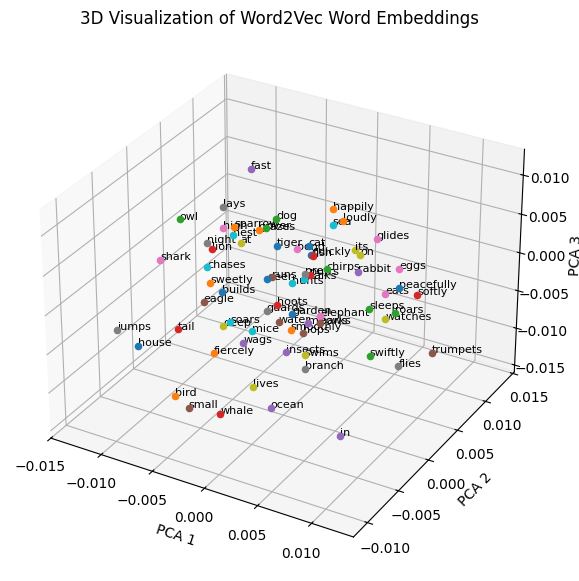

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Extended list of sentences to capture better semantic relationships
sentences = [
    ["dog", "barks", "loudly"],
    ["cat", "meows", "softly"],
    ["bird", "chirps", "sweetly"],
    ["fish", "swims", "quickly"],
    ["dog", "chases", "cat"],
    ["cat", "watches", "bird"],
    ["bird", "flies", "high"],
    ["fish", "jumps", "over", "water"],
    ["dog", "wags", "tail"],
    ["cat", "purrs", "happily"],
    ["bird", "builds", "nest"],
    ["fish", "lives", "in", "pond"],
    ["dog", "runs", "fast"],
    ["cat", "sleeps", "peacefully"],
    ["bird", "lays", "eggs"],
    ["fish", "glides", "smoothly"],
    ["dog", "guards", "house"],
    ["cat", "hunts", "mice"],
    ["bird", "hops", "on", "branch"],
    ["fish", "eats", "small", "insects"],
    ["lion", "roars", "fiercely"],
    ["tiger", "stalks", "its", "prey"],
    ["elephant", "trumpets", "loudly"],
    ["rabbit", "hops", "in", "garden"],
    ["sparrow", "flies", "swiftly"],
    ["whale", "swims", "in", "ocean"],
    ["eagle", "soars", "high"],
    ["shark", "hunts", "in", "deep", "sea"],
    ["deer", "grazes", "peacefully"],
    ["owl", "hoots", "at", "night"],
]

# Train a Word2Vec model with embedding size 3
model = Word2Vec(sentences, vector_size=300, window=3, min_count=1, sg=1)

# Extract word embeddings
words = list(model.wv.index_to_key)
embeddings = np.array([model.wv[word] for word in words])

# Apply PCA to reduce dimensions to 3 (though already 3D)
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# 3D Visualization of Word Embeddings
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each word in 3D space
for i, word in enumerate(words):
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], label=word)
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], word, fontsize=8)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D Visualization of Word2Vec Word Embeddings")
plt.show()


In [ ]:
from gensim.models import FastText

# Train FastText model
model = FastText(sentences, vector_size=5, window=3, min_count=1)

# Get word vector
print(model.wv["queen"])


[-0.00922166 -0.01213042 -0.04044878 -0.01301021  0.04980763]


In [ ]:
import gensim.downloader as api
import pandas as pd

# Load pre-trained word embeddings
word2vec_model = api.load("word2vec-google-news-300")  # Google News Word2Vec
fasttext_model = api.load("fasttext-wiki-news-subwords-300")  # FastText
glove_model = api.load("glove-wiki-gigaword-300")  # GloVe

# Choose a word to compare embeddings
word = "science"

# Get most similar words from each model
def get_similar_words(model, word, topn=10):
    try:
        return [w for w, _ in model.most_similar(word, topn=topn)]
    except KeyError:
        return []

word2vec_similar = get_similar_words(word2vec_model, word)
fasttext_similar = get_similar_words(fasttext_model, word)
glove_similar = get_similar_words(glove_model, word)

# Combine results into a DataFrame
similar_words_df = pd.DataFrame({
    "Word2Vec": word2vec_similar,
    "FastText": fasttext_similar,
    "GloVe": glove_similar
})

# Print the DataFrame
print(similar_words_df)


[--------------------------------------------------] 1.1% 19.0/1662.8MB downloaded

KeyboardInterrupt: 